<a href="https://colab.research.google.com/github/akbarhlubis/machine_learning_reading_habit/blob/main/UTS_Data_Sains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Diri Mahasiswa


---


####Nama  : Akbar Hamonangan Lubis
####Kelas : IF19E
####NPM   : 19312116

#Soal UTS Pengantar Data Sains


1. Tuliskan metode preprocessing apa yang telah Anda lakukan pada data yang telah Anda kumpulkan saat kuis.
2. Tuliskan langkah-langkah preprocessing yang telah Anda lakukan. 
3. Cantumkan data sebelum dipreprocessing dan data setelah dipreprocessing.
4. Tuliskan metode Machine Learning yang Anda gunakan untuk memproses data, sertakan rumus dan penjelasannya.

#Referensi Belajar
1. [Datacamp](https://www.datacamp.com/community/blog/python-pandas-cheat-sheet?utm_source=adwords_ppc&utm_campaignid=12492439802&utm_adgroupid=122563403481&utm_device=c&utm_keyword=pandas%20cheat%20sheet&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=504158804608&utm_targetid=aud-392016246653:kwd-385658525885&utm_loc_interest_ms=&utm_loc_physical_ms=9056683&gclid=Cj0KCQjwvYSEBhDjARIsAJMn0lhxMkIF8jDA0gFoqxrXR6sA8dpEBdhNBQdHFR2RPrY4dcbbptbEh8gaArjLEALw_wcB)
2. [Data.Flair](https://data-flair.training/blogs/python-data-cleansing/)
3. [Medium.TheInnovation](https://medium.com/the-innovation/how-to-scrape-the-most-popular-songs-on-spotify-using-python-8a8979fa6b06)
4. [Data.EnthusiatsID](https://youtu.be/MB58kLDkdZA)


## Mempersiapkan Bahan-Bahan
Pertama-tama mengimport package-package penting seperti pandas, numpy dsb. ke Googgle Collab

In [ ]:
import csv
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Kemudian Import file dataset CSV ke Google collab



In [ ]:
from google.colab import files
files.upload() 
dataset_rh = pd.read_csv('Reading Habit.csv') #Mengubah Bentuk CSV Menjadi sebuah set dataframe

##Menampilkan Dataset dan Melihat Isinya
Menampilkan 5 data teratas dataset tersebut dalam  bentuk dataframe untuk mengetahui apa saja isinya

In [ ]:
dataset_rh.head(5)

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No


##EDA

Mengetahui berapa banyak baris dan kolomnya

In [ ]:
dataset_rh.shape

(2832, 14)

Mengetahui Tipe datanya

In [ ]:
dataset_rh.dtypes

Age                                                     int64
Sex                                                    object
Race                                                   object
Marital status?                                        object
Education                                              object
Employement                                            object
Incomes                                                object
How many books did you read during last 12months?       int64
Read any printed books during last 12months?           object
Read any audiobooks during last 12months?              object
Read any e-books during last 12months?                 object
Last book you read, you…                               object
Do you happen to read any daily news or newspapers?    object
Do you happen to read any magazines or journals?       object
dtype: object

In [ ]:
dataset_rh.describe().transpose() #Menampilkan keterangan lengkap
dataset_rh.describe() #Menampilkan keterangan lengkap
dataset_rh.rank() #Menampilkan urutan data secara ranking

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,2348.0,2156.0,597.0,123.0,299.0,2508.0,865.5,2770.5,1310.5,1018.0,2049.0,1809.5,544.0,2079.5
1,1296.0,2156.0,505.0,1169.5,949.5,689.5,2460.0,2770.5,1310.5,2237.0,2049.0,1809.5,1957.5,2079.5
2,717.5,2156.0,458.0,2231.5,949.5,689.5,2460.0,2770.5,94.5,2237.0,2049.0,282.0,1957.5,2079.5
3,513.5,2156.0,458.0,1169.5,949.5,689.5,1353.0,2770.5,1310.5,1018.0,2049.0,700.0,1957.5,665.5
4,34.5,740.0,458.0,2231.5,1425.0,1486.0,108.5,2770.5,1310.5,2237.0,835.0,1809.5,1957.5,665.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,166.0,2156.0,1724.0,2231.5,949.5,1486.0,2008.5,195.5,NaN,NaN,NaN,NaN,1957.5,2079.5
2828,102.5,2156.0,1724.0,2231.5,1425.0,1486.0,1117.0,195.5,NaN,NaN,NaN,NaN,1957.5,665.5
2829,102.5,740.0,1724.0,2231.5,1425.0,1953.5,2272.5,195.5,NaN,NaN,NaN,NaN,544.0,2079.5
2830,34.5,2156.0,1724.0,2231.5,949.5,1953.5,2272.5,195.5,NaN,NaN,NaN,NaN,544.0,665.5


##Melakukan Preprocessing Data
disini label yang akan menjadi fokus utama sebagai fitur adalah Sex, Race, Marital Status, dan banyak buku yang dibaca selama 1 tahun terakhir

###Data Cleaning
Pertama-tama cari apakah ada data yang kosong alias NaN dengan menggunakan pandas

In [ ]:
dataset_rh = dataset_rh.reindex()
dataset_rh.isnull().sum()

Age                                                      0
Sex                                                      0
Race                                                     0
Marital status?                                          0
Education                                                0
Employement                                              0
Incomes                                                  0
How many books did you read during last 12months?        0
Read any printed books during last 12months?           390
Read any audiobooks during last 12months?              390
Read any e-books during last 12months?                 390
Last book you read, you…                               390
Do you happen to read any daily news or newspapers?      0
Do you happen to read any magazines or journals?         0
dtype: int64

Dari data diatas diketahui bahwa ada 390x4 data di 4 baris yang Kosong. maka disebut **Missing Values**

Oleh sebab itu dilakukan pembersihan data dengan menghapus baris yang berisi NaN

In [ ]:
dataset_rh2 = dataset_rh.dropna() #dropna untuk membuang nilai kosong didalamnya
dataset_rh2.isnull().sum()

Age                                                    0
Sex                                                    0
Race                                                   0
Marital status?                                        0
Education                                              0
Employement                                            0
Incomes                                                0
How many books did you read during last 12months?      0
Read any printed books during last 12months?           0
Read any audiobooks during last 12months?              0
Read any e-books during last 12months?                 0
Last book you read, you…                               0
Do you happen to read any daily news or newspapers?    0
Do you happen to read any magazines or journals?       0
dtype: int64

###Data Transformation
mengubah suatu data supaya diperoleh data yang lebih berkualitas. Yang akan dilakukan antara lain menghilangkan noise dari data (smoothing), meng-agregasi data, generalisasi data, normalisasi data, dan pembentukan atribut/fitur.
dalam hal ini, data yang dimiliki masih berupa huruf, agar mesin dapat memahami nya perlu diubah menjadi angka, dengan cara **Label Encoding**

Label Encoding

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
dataset_rh_le = dataset_rh2.apply(LabelEncoder().fit_transform)
dataset_rh_le

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,50,1,6,0,0,6,2,52,2,1,2,5,1,2
1,30,1,4,3,2,1,8,52,2,2,2,5,2,2
2,16,1,3,4,2,1,8,52,1,2,2,2,2,2
3,11,1,3,3,2,1,4,52,2,1,2,3,2,1
4,0,0,3,4,3,2,0,52,2,2,1,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,0,0,7,4,3,4,3,0,2,1,1,5,1,1
2438,0,0,7,4,3,4,8,0,2,1,1,3,1,1
2439,0,1,7,4,3,4,7,0,1,1,1,4,2,1
2440,0,0,7,4,3,2,7,0,2,1,1,2,1,2


Setelah itu dicek lagi Ringkasan Datanya

In [ ]:
dataset_rh_le.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,2442.0,30.527846,18.487134,0.0,15.0,31.0,45.0,76.0
Sex,2442.0,0.455774,0.498142,0.0,0.0,0.0,1.0,1.0
Race,2442.0,5.937756,2.215596,0.0,7.0,7.0,7.0,7.0
Marital status?,2442.0,3.257576,1.480030,0.0,3.0,3.0,4.0,7.0
Education,2442.0,3.286241,2.344283,0.0,2.0,3.0,6.0,7.0
Employement,2442.0,2.746519,2.049180,0.0,1.0,2.0,4.0,7.0
Incomes,2442.0,4.154382,2.797025,0.0,1.0,4.0,6.0,9.0
How many books did you read during last 12months?,2442.0,14.147420,14.607790,0.0,3.0,9.0,22.0,52.0
Read any printed books during last 12months?,2442.0,1.923014,0.281570,0.0,2.0,2.0,2.0,2.0
Read any audiobooks during last 12months?,2442.0,1.166667,0.377125,0.0,1.0,1.0,1.0,2.0


###Pemilihan Target

In [ ]:
y = dataset_rh_le['Age']
y

0       50
1       30
2       16
3       11
4        0
        ..
2437     0
2438     0
2439     0
2440     0
2441     0
Name: Age, Length: 2442, dtype: int64

###Pemilihan Fitur

In [ ]:
features = dataset_rh_le[['Sex','Race','Marital status?','Education','How many books did you read during last 12months?']]
x = features
x

,Sex,Race,Marital status?,Education,How many books did you read during last 12months?
0,1,6,0,0,52
1,1,4,3,2,52
2,1,3,4,2,52
3,1,3,3,2,52
4,0,3,4,3,52
...,...,...,...,...,...
2437,0,7,4,3,0
2438,0,7,4,3,0
2439,1,7,4,3,0
2440,0,7,4,3,0


##Metode Machine Learning (Decision Tree & Random Forest)

###Decision Tree Regresor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Membuat Model

In [ ]:
age_model = DecisionTreeRegressor(random_state=1)

Training Model

In [ ]:
age_model.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

Melakukan Prediksi

In [ ]:
age_model.predict(x.head())

array([50., 30., 16., 11.,  0.])

Evaluasi Prediksi

In [ ]:
y.head()

0    50
1    30
2    16
3    11
4     0
Name: Age, dtype: int64

Setelah dicoba diprediksi menggunakan data yang sama, hasilnya tetap dan akurat.

###Random Forest

Import library 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Memisahkan/split x dan y menjadi beberapa untuk melakukan random forest

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2 )

In [ ]:
clasifier = RandomForestClassifier()
clasifier.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Y_pred = clasifier.predict(X_test)
Y_pred

array([ 0, 31,  6, 16, 11, 20, 32,  6, 33, 54, 34,  8, 24, 39, 46, 23, 49,
       37, 40,  5,  5, 49, 33, 54, 20,  3, 22, 23, 63,  6,  3,  5, 14, 63,
       72, 51, 56, 44, 44, 11, 37, 34, 48, 29, 66, 33, 32, 46, 18, 11, 11,
       36, 61, 55,  4,  5, 24, 23,  0, 22, 10, 41, 40, 56, 69, 42, 67, 38,
       33, 34, 38,  6, 16, 39, 38, 44, 24, 20, 32, 14, 63, 22, 40, 31,  4,
       40, 32, 22,  0,  6,  2,  0, 35, 24,  6, 57, 15,  0,  0, 27, 33, 15,
       39,  9, 36,  4, 24,  0,  9, 39, 34, 49, 16, 39, 56, 39, 10, 21, 50,
       14, 16,  2, 67, 40, 56, 25, 41, 10,  9, 25, 43, 45, 40, 52, 56, 39,
       51, 56, 47, 23, 39, 40, 41, 35, 39, 58, 19,  0, 72,  2, 43, 45, 23,
       15, 56, 63, 37, 37, 56, 61, 23, 24, 27, 44, 21, 13, 69, 32, 44, 32,
       44, 24,  1, 20, 21, 22, 56, 17,  7,  5, 19, 36, 32, 54, 41, 16, 35,
       42, 38, 48, 36,  2, 19, 15, 70, 36, 43, 20, 13, 27, 16, 40, 45, 39,
       33, 63, 55,  0, 12, 37, 38, 50, 19, 14,  7,  5, 39, 33, 28, 34, 23,
       39, 37, 35, 24, 22

In [ ]:
r2_score(Y_test,Y_pred)

-0.13726185274517855

##Visualiasasi

Mencari berapa banyak masing-masing gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


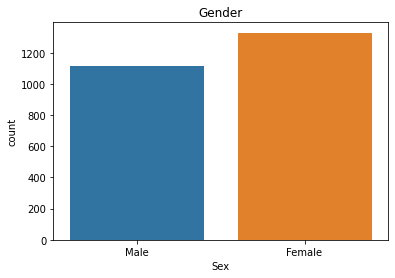

In [ ]:
sns.countplot(dataset_rh2['Sex']).set_title('Gender')
x = dataset_rh_le['How many books did you read during last 12months?']
y = dataset_rh_le['Race']

menampilkan masing-masing ras berdasarkan gender



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


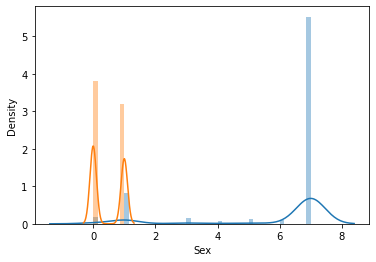

In [ ]:
sns.distplot(x['Race'])
sns.distplot(x['Sex']);

Menampilkan Plot dari feature dan target

<function matplotlib.pyplot.legend>

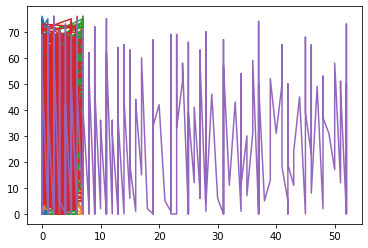

In [ ]:
plt.plot(x,y)
plt.legend

Menampilkan data multidimensional untuk mengetahui relasi antar gender

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


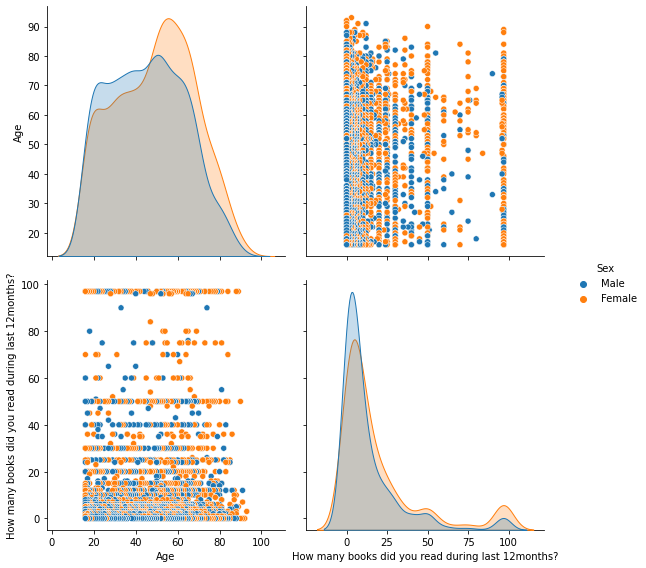

In [ ]:
sns.pairplot(dataset_rh,hue='Sex',size=4.0)